<a href="https://colab.research.google.com/github/kavinda-athu/Image-processing-assignment2/blob/main/assignment2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install circle_fit

  Created wheel for circle-fit: filename=circle_fit-0.1.3-py3-none-any.whl size=3482 sha256=7c20a0ed5a3dde82e13f4f0e05de46a43ab0440da2c1ac036f2598a24b6bfb40
  Stored in directory: /root/.cache/pip/wheels/67/ff/bd/b5c2bbb2c7d2d09acc322a5f3bf9666b1121b0e17c0b31f5a2
Successfully built circle-fit


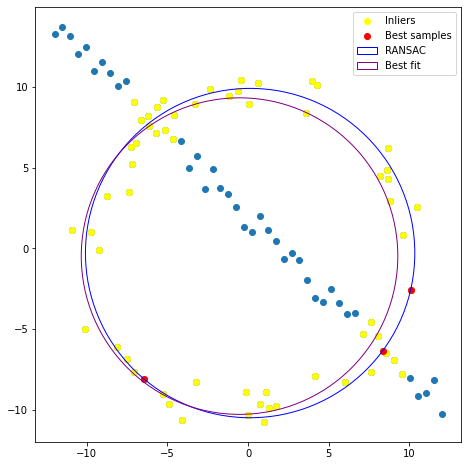

In [15]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
import circle_fit as cf
#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x +b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

def cir_plot(Data,Datalst,color):
    p1,p2,p3=Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]]
    cirx,ciry,r,p=cf.least_squares_circle([p1,p2,p3])
    c=plt.Circle((cirx,ciry),r,fill=False)
    c.set_color(color)
    return c

def RANSAC(Data,iter,thres,inliers_c):
    Max=0
    out=np.array([])
    for i in range(iter):
        randomP=np.random.choice(Data.size//2, size=3, replace=False)
        p1,p2,p3=Data[randomP[0]],Data[randomP[1]],Data[randomP[2]]
        cirx,ciry,r,p=cf.least_squares_circle([p1,p2,p3])
        T=np.array(abs(((Data[:,0]-cirx)**2+(Data[:,1]-ciry)**2)**0.5-r))
        if r>max(Data[:,1])*1.5:
            continue
        inliares=Data[T<thres]
        if len(inliares)>inliers_c:
            shrt_d=np.array(abs(((inliares[:,0]-cirx)**2+(inliares[:,1]-ciry)**2)**0.5-r))
            Mean = sum(shrt_d/shrt_d.size)
            if Max < len(inliares):
                out=randomP
                inli=inliares
                best=Mean
            elif Max == len(inliares) and best>Mean:
                out=randomP
                inli=inliares
                best=Mean
    return out,inli

Ran,best_inlier=RANSAC(X,35,1.96,50)         
c1=cir_plot(Ran,X, color = 'blue')
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( c1 )

p1=ax.scatter(X[:,0],X[:,1])
inliers=ax.scatter(best_inlier[:,0],best_inlier[:,1], color='yellow' )

bestfit,inl=RANSAC(best_inlier,25,1.96,best_inlier.size//2.2)
c2=cir_plot(bestfit,best_inlier, color ='purple')
ax.add_artist( c2 )

Y=np.vstack((X[Ran[0]],X[Ran[1]],X[Ran[2]]))
best_samples=ax.scatter(Y[:,0],Y[:,1], c = 'r')
plt.legend(handles=[inliers,best_samples,c1,c2],labels=['Inliers','Best samples','RANSAC','Best fit'])
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


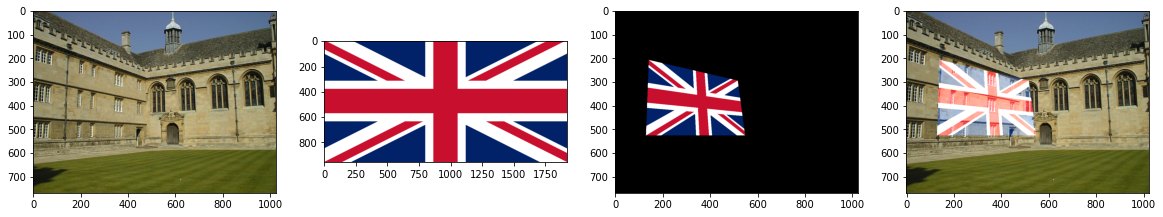

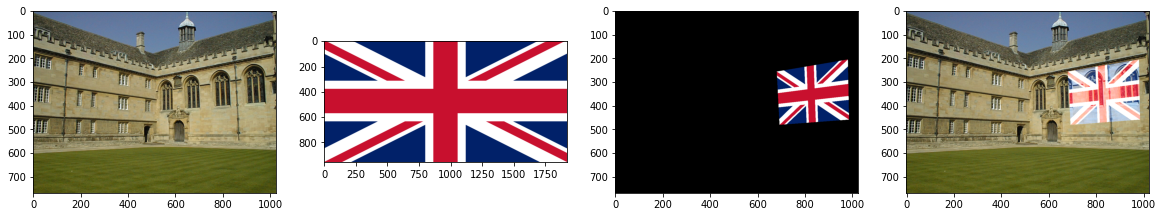

In [ ]:
#Q2
import numpy as np
import cv2 as cv
import matplotlib . pyplot as plt

def warping_and_superimposing(img1,img2,p1,p2):
  imgmain = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
  imginsert = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
  fig, ax = plt.subplots(1,4,figsize=(20,20))
  ax[0].imshow(imgmain)
  ax[1].imshow(imginsert)
  P, mask = cv.findHomography(p1, p2, cv.RANSAC, 5.0)
  h,w,l=imgmain.shape
  warped = cv.warpPerspective(imginsert, P, (w, h))
  ax[2].imshow(warped)
  superimposed = cv.addWeighted(imgmain,1,warped,0.9,1)
  ax[3].imshow(superimposed)
  plt.show()

#1
img1 =cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/building1.jpg')
img2 = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/flag.png')
p1 = np.array([[0,0], [0,960],[1920,0], [1920,960]])
p2 = np.array([[142,206],[130,525], [517,293],[548,525]])
warping_and_superimposing(img1,img2 ,p1,p2)

#2
img1 =cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/building2.jpg')
img2 = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/flag.png')
p1 = np.array([[0,0], [0,960],[1920,0], [1920,960]])
p2 = np.array([[681,255],[693,480], [981,204],[986,458]])
warping_and_superimposing(img1,img2  ,p1,p2)

In [ ]:
#Q3 part a
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img1 = cv.cvtColor(cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/pics/img1.ppm'),cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/pics/img2.ppm'),cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/pics/img3.ppm'),cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/pics/img4.ppm'),cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/pics/img5.ppm'),cv.COLOR_BGR2RGB)

def Sift_Match(img1,img2):
    sift = cv.SIFT_create()
    im1, des_1 = sift.detectAndCompute(img1, None) 
    im2, des_2 = sift.detectAndCompute(img2, None)
    T1 = cv.BFMatcher(cv.NORM_L1, crossCheck = True)
    Match = T1.match(des_1, des_2)
    sortMatch = sorted(Match, key = lambda x:x.distance)
    img4 = cv.drawMatches(img1, im1, img2, im2, sortMatch[:100], img2, flags =2)
    fig, ax = plt.subplots(1,1, figsize = (15, 15))
    ax.imshow(img4)
    ax.axis('off')
    plt.show()
    return Match,[im1,im2]

In [ ]:
pip install opencv-python==4.5.3.56

     |████████████████████████████████| 49.9 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


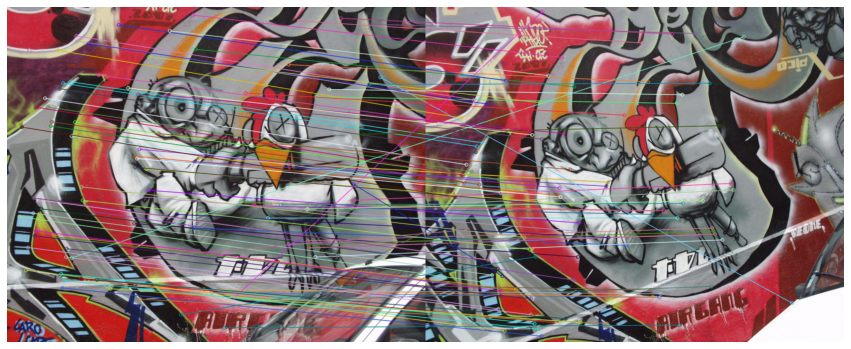

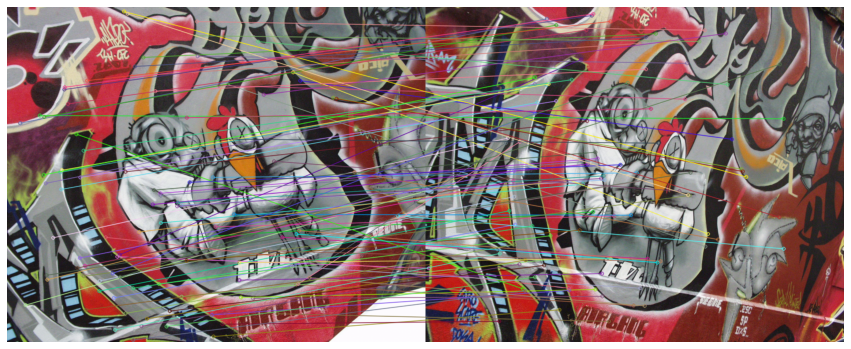

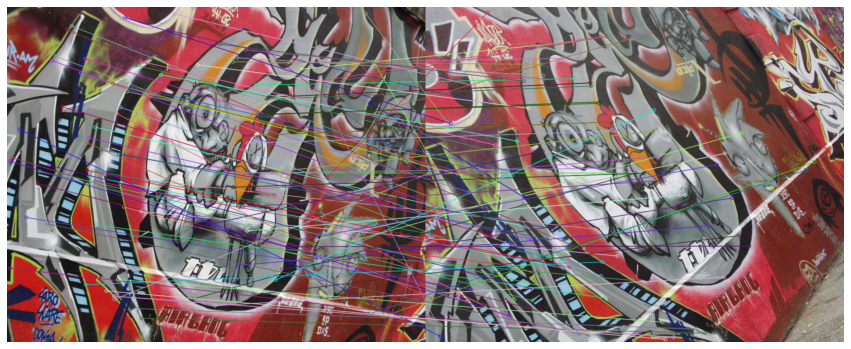

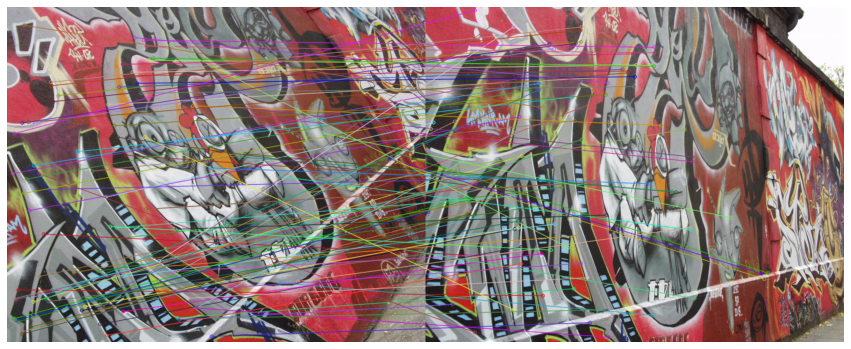

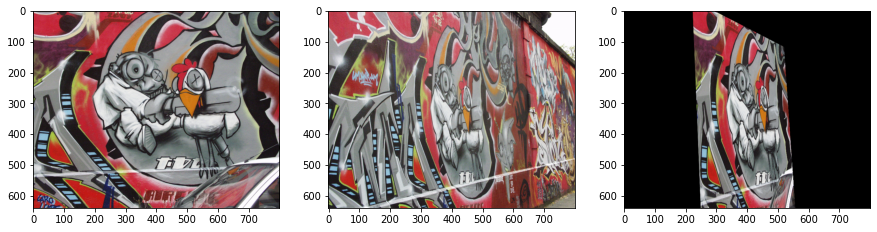

[[ 6.78103672e-01  2.14010829e-02  2.19633135e+02]
 [ 2.60032881e-01  1.16050602e+00 -3.68021544e+01]
 [ 5.95329900e-04 -1.16551150e-04  9.94919179e-01]]


In [ ]:
#Q3 part b and part c
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random

def Distance(corres, H):
    pts1 = np.transpose(np.matrix([corres[0].item(0), corres[0].item(1), 1]))
    es_pts1 = np.dot(H, pts1)
    es_pts2 = (1/es_pts1.item(2))*es_pts1
    
    pts2 = np.transpose(np.matrix([corres[0].item(2), corres[0].item(3), 1]))
    err = pts2 - es_pts2
    return np.linalg.norm(err)

def RANSAC(corres, thresh):
    final = None
    max_inliers = []
    for i in range(1000):
        corres1 = corres[random.randrange(0, len(corres))]
        corres2 = corres[random.randrange(0, len(corres))]
        rand_four = np.vstack((corres1, corres2))
        corres3 = corres[random.randrange(0, len(corres))]
        rand_four = np.vstack((rand_four, corres3))
        corres4 = corres[random.randrange(0, len(corres))]
        rand_four = np.vstack((rand_four, corres4))
        H = calc_Homography(rand_four)
        inliers = []
        for i in range(len(corres)):
            if Distance(corres[i], H) < 5:
                inliers.append(corres[i])
        if len(inliers) > len(max_inliers):
            max_inliers = inliers
            final = H
        if len(max_inliers) > (len(corres)*thresh):
            break
    return final, max_inliers

def corresList(match,key):
    corres_list = []
    pts = [key[0],key[1]]

    for match in match:
        (x1, y1) = pts[0][match.queryIdx].pt
        (x2, y2) = pts[1][match.trainIdx].pt
        corres_list.append([x1, y1, x2, y2])
    return corres_list
    
def calc_Homography(corres):
    lis = []
    for corr in corres:
        pts1 = np.matrix([corr.item(0), corr.item(1), 1])
        pts2 = np.matrix([corr.item(2), corr.item(3), 1])

        A2 = [0, 0, 0, -pts2.item(2) * pts1.item(0), -pts2.item(2) * pts1.item(1), -pts2.item(2) * pts1.item(2),pts2.item(1) * pts1.item(0), 
              pts2.item(1) * pts1.item(1), pts2.item(1) * pts1.item(2)]
        A1 = [-pts2.item(2) * pts1.item(0), -pts2.item(2) * pts1.item(1), -pts2.item(2) * pts1.item(2), 0, 0, 0, pts2.item(0) * pts1.item(0), 
              pts2.item(0) * pts1.item(1), pts2.item(0) * pts1.item(2)]

        lis.append(A1)
        lis.append(A2)

    Mat = np.matrix(lis)
    a, b, c = np.linalg.svd(Mat)
    H = np.reshape(c[8], (3, 3))
    H = (1/H.item(8)) * H
    return H

M1,K1=Sift_Match(img1,img2)
corres_lis1=corresList(M1,K1)
corres1 = np.matrix(corres_lis1)
H1, inliers1 = RANSAC(corres1, 0.6)

M2,K2=Sift_Match(img2,img3)
corres_lis2=corresList(M2,K2)
corres2 = np.matrix(corres_lis2)
H2, inliers2 = RANSAC(corres2, 0.6)

M3,K3=Sift_Match(img3,img4)
corres_lis3=corresList(M3,K3)
corres3 = np.matrix(corres_lis3)
H3, inliers3 = RANSAC(corres3, 0.6)

M4,K4=Sift_Match(img4,img5)
corres_lis4=corresList(M4,K4)
corres4 = np.matrix(corres_lis4)
H4, inliers4 = RANSAC(corres4, 0.6)

H = H4 @ H3 @ H2 @ H1
DST1 = cv.warpPerspective(img1, H, ((img5.shape[1]), img5.shape[0]))
fig, ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow(img1)
ax[1].imshow(img5)
ax[2].imshow(DST1)
plt.show()
print(H)



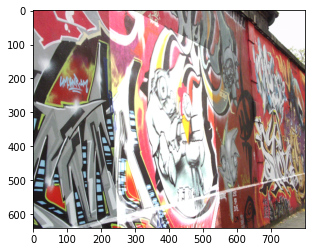

In [16]:
sifted=cv.add(img5,DST1)
plt.imshow(sifted)

In [18]:
OriginalHomography = np.array([ [6.2544644e-01,5.7759174e-02,2.2201217e+02],[2.2240536e-01,1.1652147e+00,-2.5605611e+01],
[4.9212545e-04,-3.6542424e-05,1.0000000e+00]])
SSD= np.sum(np.sum((OriginalHomography-H)*(OriginalHomography-H)))
print("SSD =",SSD)

SSD = 0.31447023851585193
